## ROC曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [5]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [7]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [8]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [9]:
decision_scores = log_reg.decision_function(X_test)

In [11]:
%run ../playML/metrics.py

In [13]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

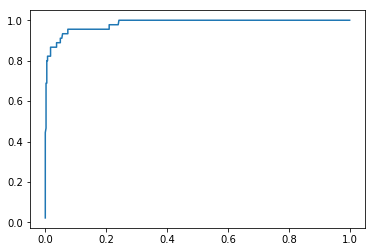

In [14]:
plt.plot(fprs, tprs)
plt.show()

### scikit-learn中的ROC曲线

In [16]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

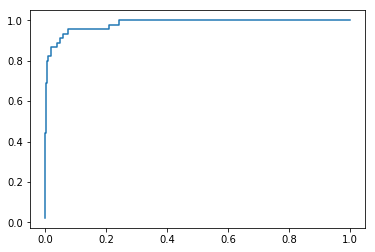

In [18]:
plt.plot(fprs, tprs)
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score

# 求曲线下面的面积
roc_auc_score(y_test, decision_scores)

0.9830452674897119